In [1]:
import pandas as pd
import numpy as np

# Loading the Credit Risk dataset
credit_risk_data = pd.read_csv('credit_risk_dataset.csv') 

In [2]:
# EDA for Credit Risk Dataset
print(credit_risk_data.describe())       # Summary statistics
print(credit_risk_data.info())           # Data types and non-null counts
print(credit_risk_data.isnull().sum())   # Check for missing values

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Data Cleaning
# Check for missing values before cleaning
print("Missing values in Credit Risk dataset (Before Cleaning):")
print(credit_risk_data.isnull().sum())

# For categorical columns: Fill missing values with mode
credit_risk_data.fillna(credit_risk_data.mode().iloc[0], inplace=True)

# Check for missing values after cleaning
print("\nMissing values in Credit Risk dataset (After Cleaning):")
print(credit_risk_data.isnull().sum())

# Separating features and target variable
X_credit = credit_risk_data.drop('loan_status', axis=1)  
y_credit = credit_risk_data['loan_status']  

# Identifying categorical and numerical columns
categorical_cols_credit = X_credit.select_dtypes(include=['object']).columns
numerical_cols_credit = X_credit.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing the features: scaling numerical data and encoding categorical data
preprocessor_credit = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_credit),  # Scaling numerical features
        ('cat', OneHotEncoder(), categorical_cols_credit)  # One-hot encoding categorical features
    ])


Missing values in Credit Risk dataset (Before Cleaning):
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Missing values in Credit Risk dataset (After Cleaning):
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [4]:
# Check dataset structure and data types
print(credit_risk_data.info())

# Summary statistics for numerical columns
print(credit_risk_data.describe())

# Check unique values in categorical columns
for col in categorical_cols_credit:
    print(f"Unique values in {col}: {credit_risk_data[col].nunique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None
         person_age  perso

In [5]:
# Import necessary library for getting feature names
from sklearn.compose import make_column_transformer

# Fit and transform the data
X_credit_processed = preprocessor_credit.fit_transform(X_credit)

# Retrieve feature names
feature_names = []
for name, transformer, cols in preprocessor_credit.transformers_:
    if name == 'num':  # Numerical columns remain the same
        feature_names.extend(cols)
    elif name == 'cat':  # Get feature names from OneHotEncoder
        encoder_feature_names = preprocessor_credit.named_transformers_['cat'].get_feature_names_out(input_features=cols)
        feature_names.extend(encoder_feature_names)

# Convert preprocessed data back to a DataFrame
X_credit_processed_df = pd.DataFrame(X_credit_processed.toarray() if hasattr(X_credit_processed, "toarray") else X_credit_processed, columns=feature_names)

# Check the transformed data
print(X_credit_processed_df.head())



   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -0.903374      -0.114143          28.450269   4.019404       1.644526   
1   -1.060904      -0.911147           0.082192  -1.358650       0.142564   
2   -0.430783      -0.911147          -0.879438  -0.646849       0.675022   
3   -0.745843      -0.009274          -0.158215   4.019404       1.401380   
4   -0.588313      -0.188358           0.803414   4.019404       1.105912   

   loan_percent_income  cb_person_cred_hist_length  \
0             3.931411                   -0.691554   
1            -0.657458                   -0.938167   
2             3.744110                   -0.691554   
3             3.369508                   -0.938167   
4             3.556809                   -0.444942   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
0                             0.0                          0.0   
1                             0.0                          0.0   
2             

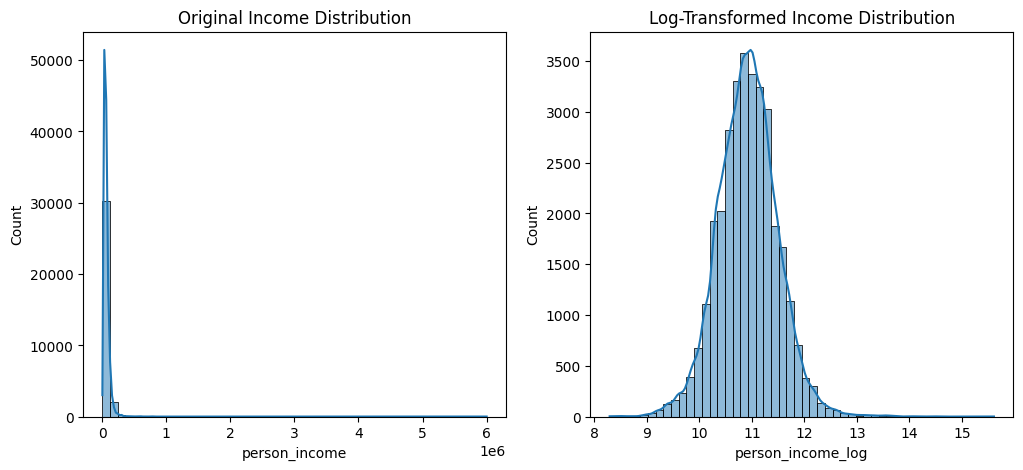

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Log transformation for income
credit_risk_data['person_income_log'] = np.log1p(credit_risk_data['person_income'])

# Visualizing the transformation
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(credit_risk_data['person_income'], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Original Income Distribution")

sns.histplot(credit_risk_data['person_income_log'], bins=50, kde=True, ax=ax[1])
ax[1].set_title("Log-Transformed Income Distribution")

plt.show()


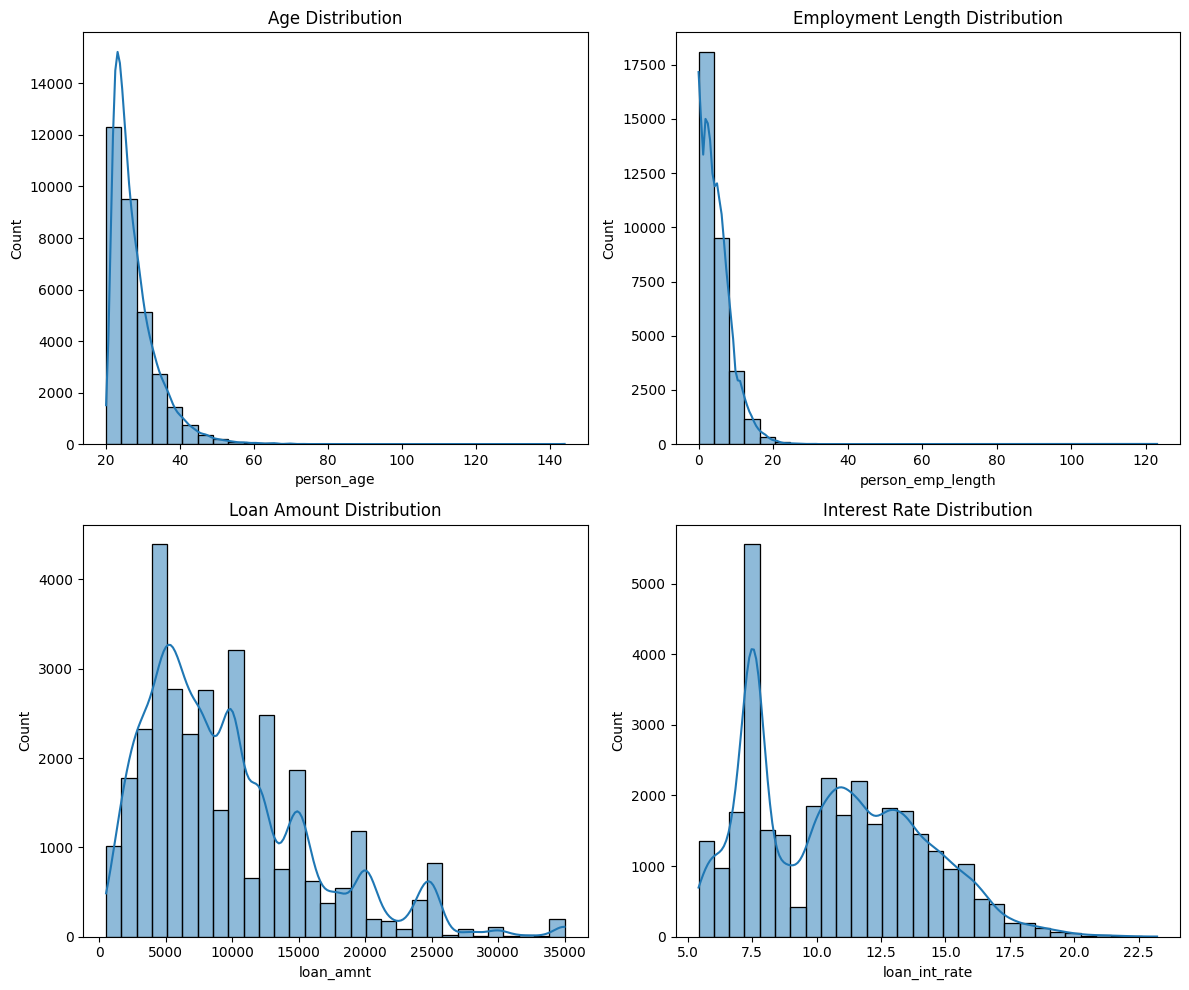

In [7]:
# Visualizing numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(credit_risk_data['person_age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

sns.histplot(credit_risk_data['person_emp_length'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Employment Length Distribution")

sns.histplot(credit_risk_data['loan_amnt'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Loan Amount Distribution")

sns.histplot(credit_risk_data['loan_int_rate'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Interest Rate Distribution")

plt.tight_layout()
plt.show()


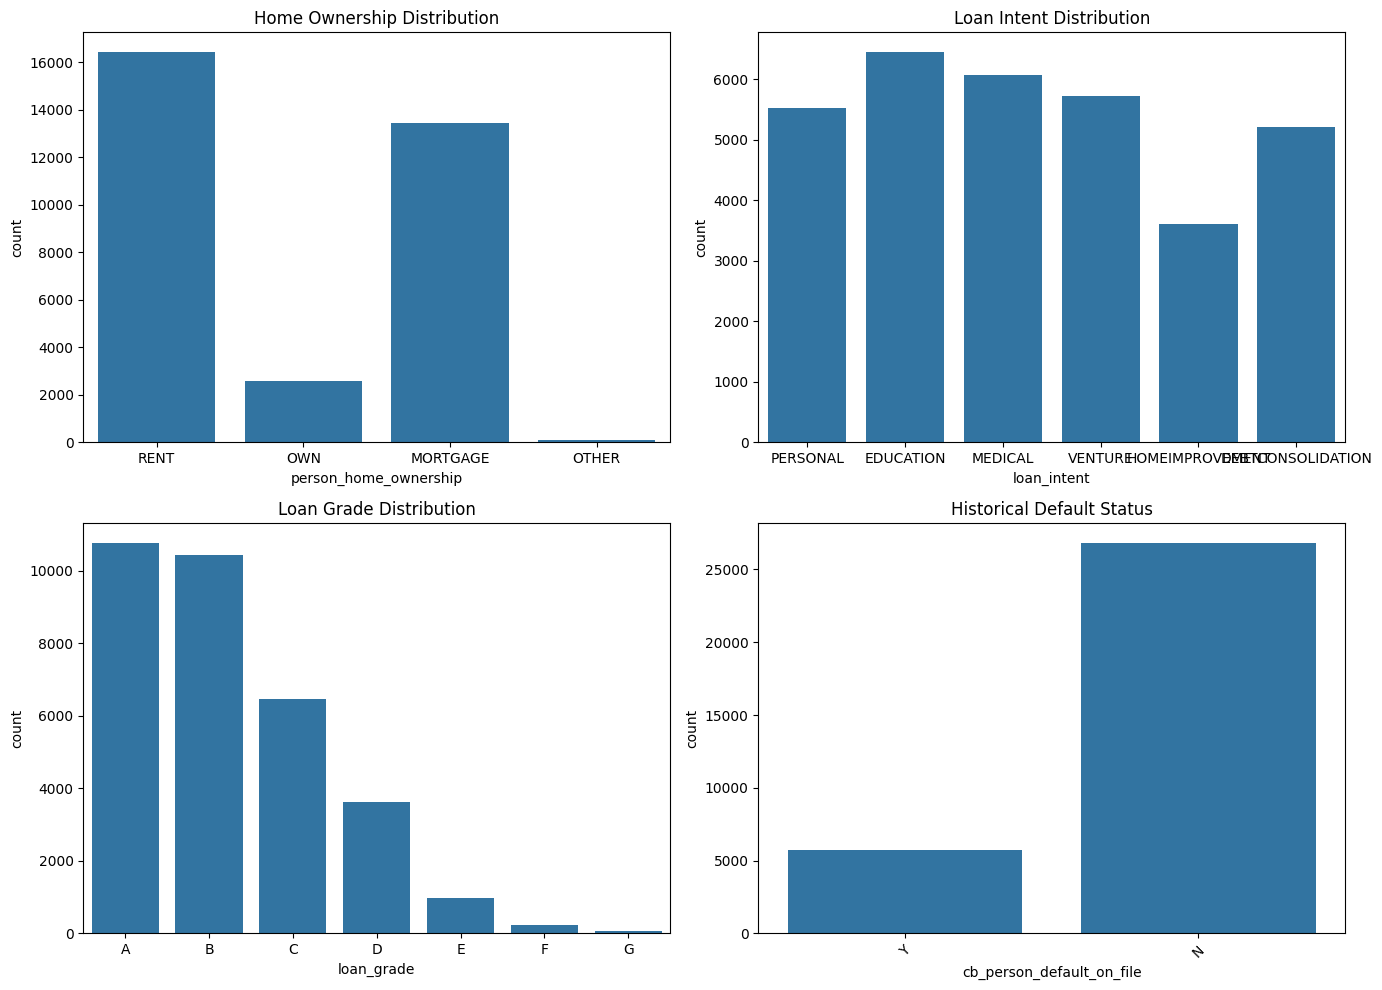

In [8]:
# Visualizing categorical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='person_home_ownership', data=credit_risk_data, ax=axes[0, 0])
axes[0, 0].set_title("Home Ownership Distribution")

sns.countplot(x='loan_intent', data=credit_risk_data, ax=axes[0, 1])
axes[0, 1].set_title("Loan Intent Distribution")

sns.countplot(x='loan_grade', data=credit_risk_data, order=sorted(credit_risk_data['loan_grade'].unique()), ax=axes[1, 0])
axes[1, 0].set_title("Loan Grade Distribution")

sns.countplot(x='cb_person_default_on_file', data=credit_risk_data, ax=axes[1, 1])
axes[1, 1].set_title("Historical Default Status")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


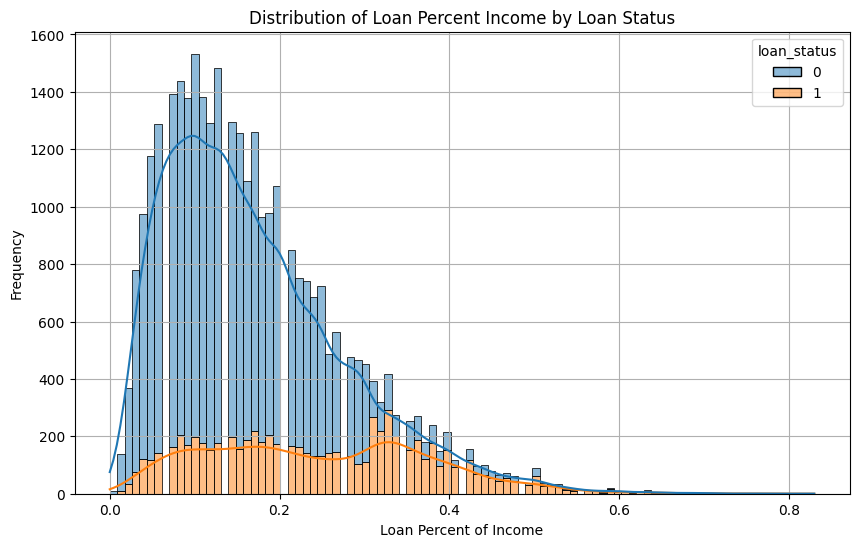

In [9]:

# Histogram of loan_percent_income for default and non-default loans
plt.figure(figsize=(10,6))
sns.histplot(data=credit_risk_data, x='loan_percent_income', hue='loan_status', multiple='stack', kde=True)
plt.title('Distribution of Loan Percent Income by Loan Status')
plt.xlabel('Loan Percent of Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

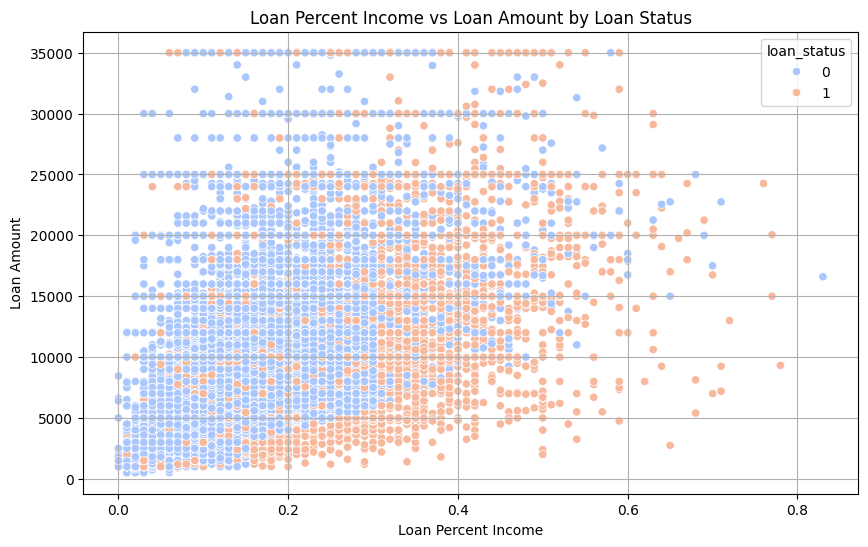

In [10]:
# Scatter plot of loan_percent_income vs loan_amnt with loan_status as color
plt.figure(figsize=(10,6))
sns.scatterplot(data=credit_risk_data, x='loan_percent_income', y='loan_amnt', hue='loan_status', palette='coolwarm')
plt.title('Loan Percent Income vs Loan Amount by Loan Status')
plt.xlabel('Loan Percent Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

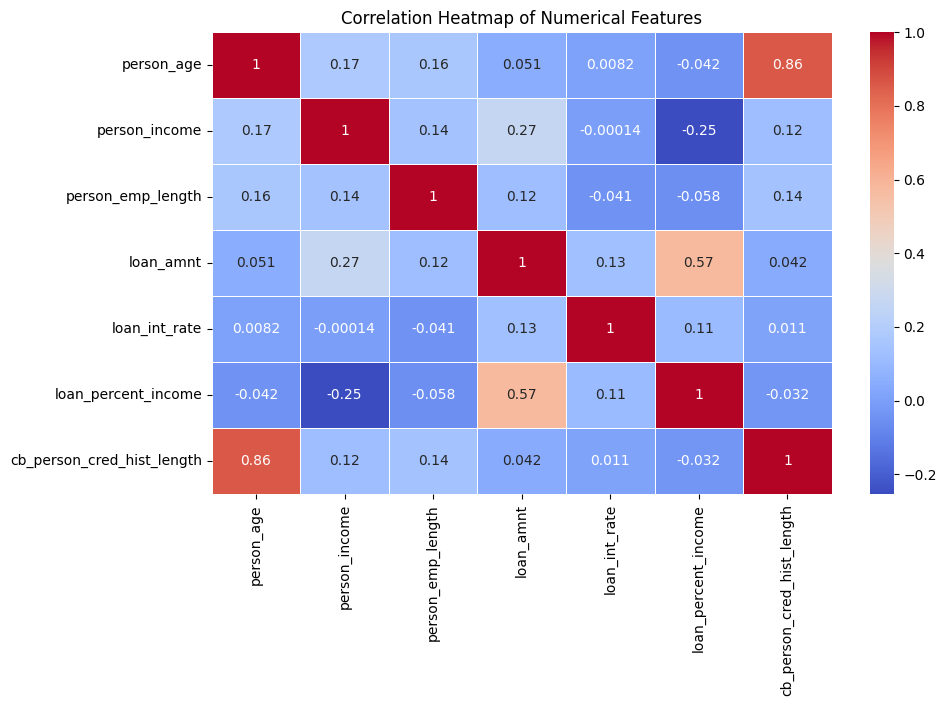

In [11]:
# Compute correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(credit_risk_data[numerical_cols_credit].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


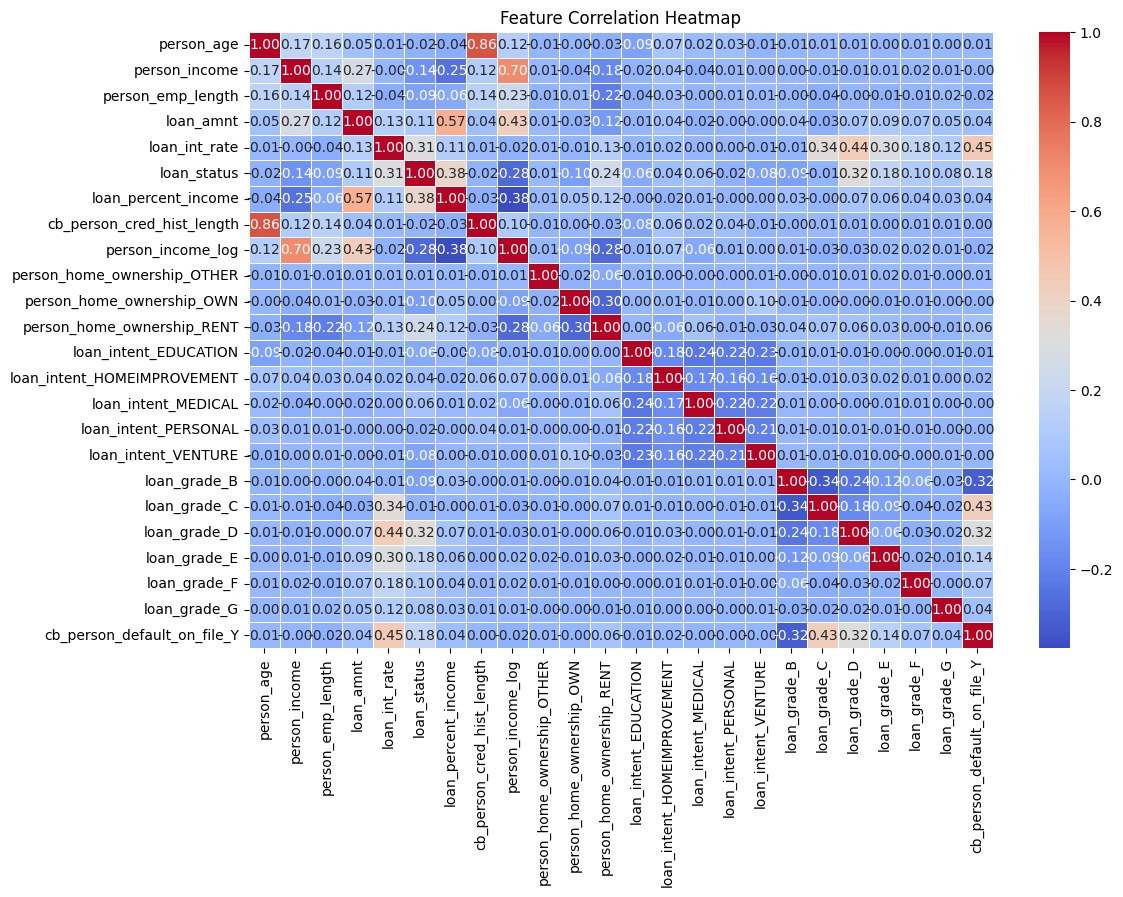

In [12]:
# Convert categorical variables into numerical using one-hot encoding
credit_risk_encoded = pd.get_dummies(credit_risk_data, drop_first=True)

# Compute correlation matrix for numerical features only
corr_matrix = credit_risk_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

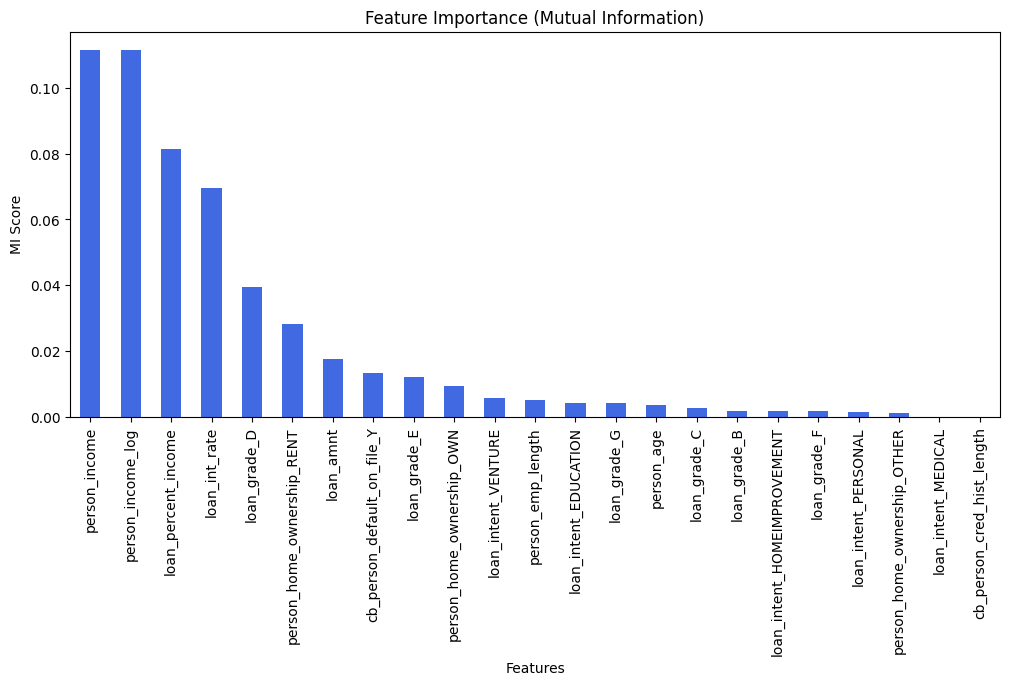

In [13]:
from sklearn.feature_selection import mutual_info_classif

# Encoding categorical variables before MI calculation
X_categorical = credit_risk_data.select_dtypes(include=['object'])
X_encoded = pd.get_dummies(X_categorical, drop_first=True)
X_numeric = credit_risk_data.select_dtypes(include=['int64', 'float64']).drop(columns=['loan_status'])

# Combine encoded categorical and numeric data
X_combined = pd.concat([X_numeric, X_encoded], axis=1)

# Fill missing values before computing MI scores
X_combined.fillna(X_combined.median(numeric_only=True), inplace=True)

# Target variable
y = credit_risk_data['loan_status']

# Compute mutual information
mi_scores = mutual_info_classif(X_combined, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_combined.columns).sort_values(ascending=False)

# Plot MI scores
plt.figure(figsize=(12, 5))
mi_scores_series.plot(kind='bar', color='royalblue')
plt.title("Feature Importance (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("MI Score")
plt.xticks(rotation=90)
plt.show()



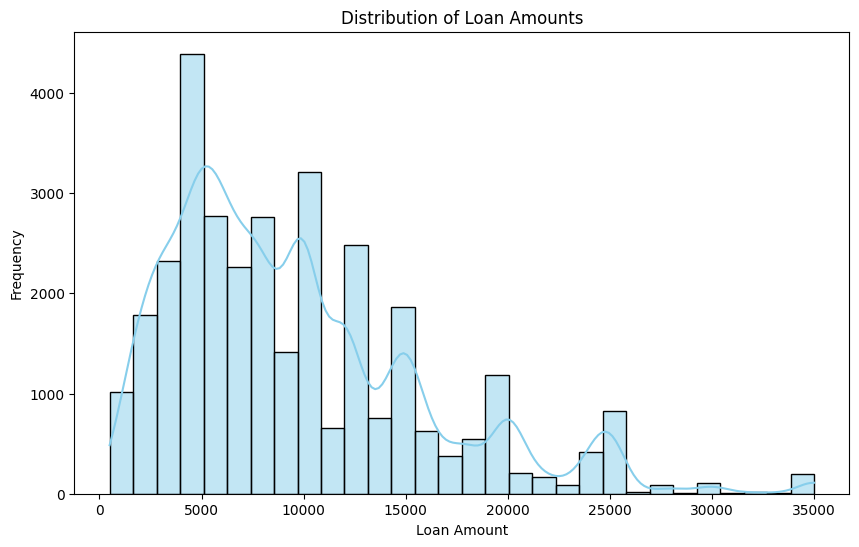

In [14]:
# Plotting the distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(credit_risk_data['loan_amnt'], bins=30, kde=True, color='skyblue')  # kde for smoothed curve
plt.title('Distribution of Loan Amounts')  # Title of the plot
plt.xlabel('Loan Amount')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label
plt.show()  # Display the plot

/var/folders/t2/gqmlx48x5kx5g5r_t3hzzy380000gn/T/ipykernel_89743/1310674107.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=credit_risk_data, palette='Set2')  # Count plot for loan status


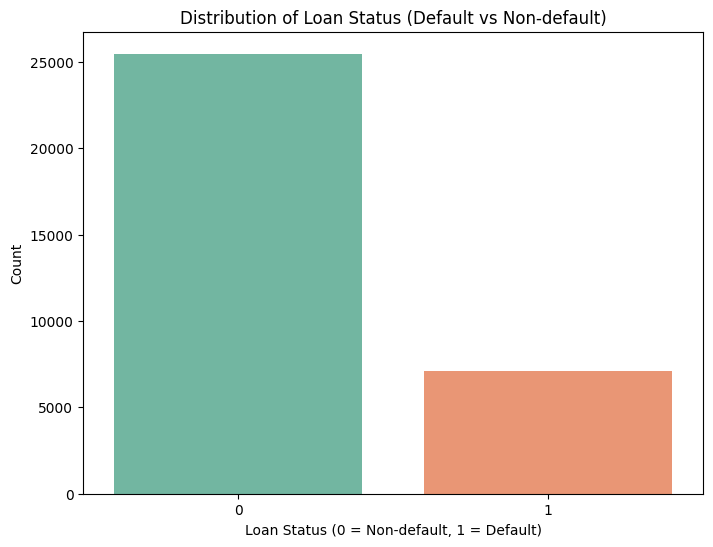

In [15]:
# Plotting the distribution of loan status (default vs non-default)
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=credit_risk_data, palette='Set2')  # Count plot for loan status
plt.title('Distribution of Loan Status (Default vs Non-default)')  # Plot title
plt.xlabel('Loan Status (0 = Non-default, 1 = Default)')  # Label for X-axis
plt.ylabel('Count')  # Label for Y-axis
plt.show()  # Display the plot



/var/folders/t2/gqmlx48x5kx5g5r_t3hzzy380000gn/T/ipykernel_89743/925142574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_grade', y='loan_amnt', data=credit_risk_data, palette='Set3')  # Boxplot for loan amount by loan grade


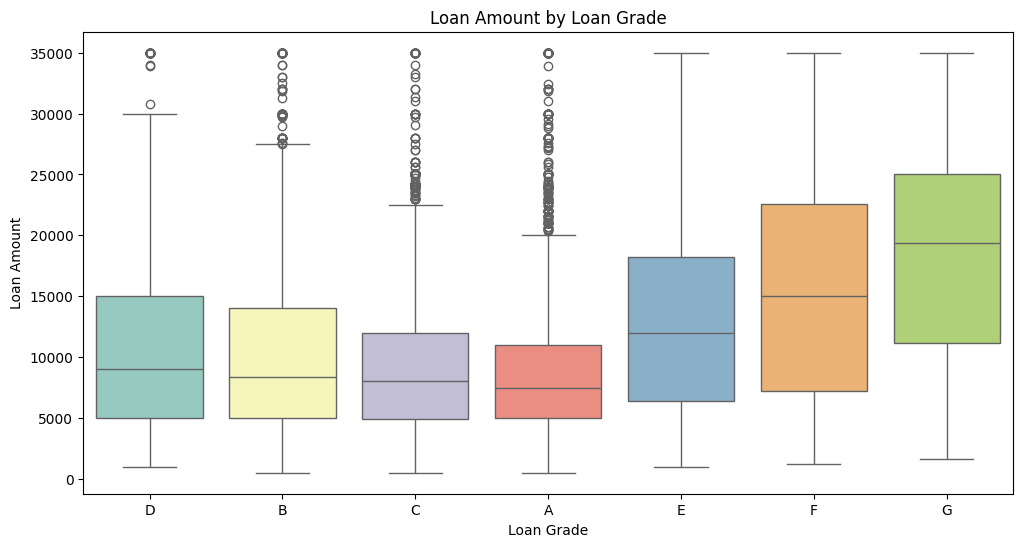

In [16]:
# Boxplot showing loan amounts by loan grade
plt.figure(figsize=(12, 6))  # Size of the plot
sns.boxplot(x='loan_grade', y='loan_amnt', data=credit_risk_data, palette='Set3')  # Boxplot for loan amount by loan grade
plt.title('Loan Amount by Loan Grade')  # Plot title
plt.xlabel('Loan Grade')  # Label for X-axis
plt.ylabel('Loan Amount')  # Label for Y-axis
plt.show()  # Display the plot



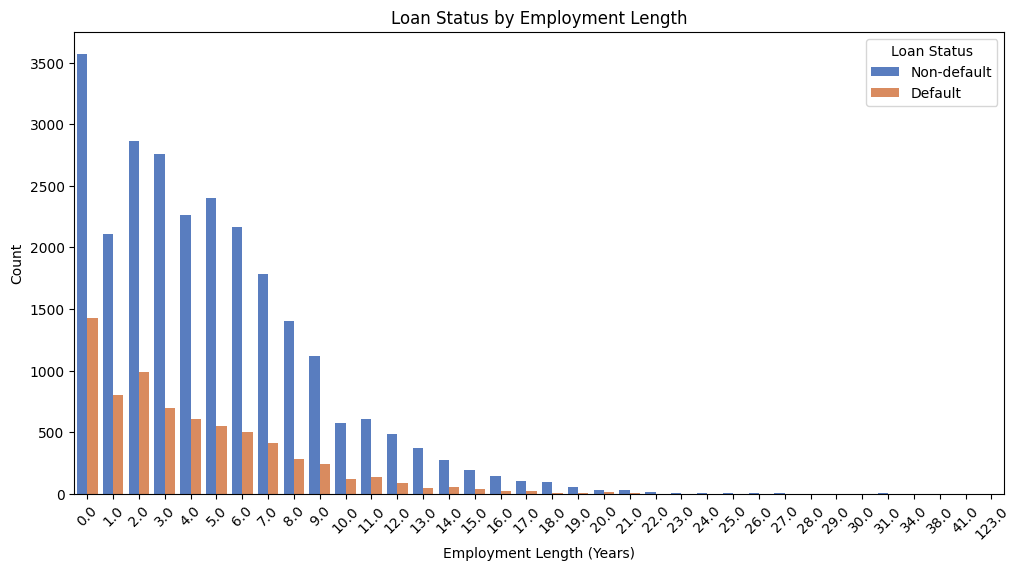

In [17]:
# Countplot of loan status by employment length (how long the person has been employed)
plt.figure(figsize=(12, 6))  # Size of the plot
sns.countplot(x='person_emp_length', hue='loan_status', data=credit_risk_data, palette='muted')  # Count plot with hue for loan status
plt.title('Loan Status by Employment Length')  # Plot title
plt.xlabel('Employment Length (Years)')  # Label for X-axis
plt.ylabel('Count')  # Label for Y-axis
plt.legend(title='Loan Status', labels=['Non-default', 'Default'])  # Legend title and labels
plt.xticks(rotation=45)  # Rotate X-axis labels for readability
plt.show()  # Display the plot

